In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tqdm.auto import tqdm
import pickle

## Load the data

## Train and Validation Split

In [7]:
# run for second time
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "preprocessed_data_lemmatizer.csv"
preprocessed_data_path = folder_path + file_path
df = pd.read_csv(preprocessed_data_path)

In [8]:
# run for second time
df.head()

,id,category,text
0,2009.0642,cs,completely self supervised crowd counting via ...
1,2010.13821,cs,wavelet flow fast training high resolution nor...
2,1904.12782,math,transversally elliptic complex cohomological f...
3,2105.00878,math,malliavin rubel theorem small entire function ...
4,1906.04024,math,odd cycle game connected rule study positional...


In [9]:
print(f"There are total {df.category.nunique()} classes")

There are total 23 classes


In [10]:
# run for second time
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(df["category"])

label = le.transform(df["category"])

df["label"] = label
df.head()

,id,category,text,label
0,2009.0642,cs,completely self supervised crowd counting via ...,3
1,2010.13821,cs,wavelet flow fast training high resolution nor...,3
2,1904.12782,math,transversally elliptic complex cohomological f...,12
3,2105.00878,math,malliavin rubel theorem small entire function ...,12
4,1906.04024,math,odd cycle game connected rule study positional...,12


In [ ]:
# run for second time
label_list = list(range(0, 23))
le.inverse_transform(label_list)

array(['alg-geom', 'astro-ph', 'cond-mat', 'cs', 'econ', 'eess',
       'funct-an', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th',
       'math', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics',
       'q-alg', 'q-bio', 'q-fin', 'quant-ph', 'stat'], dtype=object)

In [ ]:
df.label.value_counts()

3     262503
12    177679
2      71772
17     66282
1      58737
22     51308
5      34330
21     25171
11     19706
10     19207
7      15590
13     12238
19     10530
8       7435
16      6662
14      6047
20      5942
4       3924
15      3627
9       2538
18         2
6          1
0          1
Name: label, dtype: int64

### Duplicate the categories with count 1 

In [ ]:
al_geom = df.loc[df["category"] == "alg-geom"]
funct_an = df.loc[df["category"]=="funct-an"]

In [ ]:
df = pd.concat([df, al_geom, funct_an], axis = 0)

In [ ]:
df.label.value_counts()

3     262503
12    177679
2      71772
17     66282
1      58737
22     51308
5      34330
21     25171
11     19706
10     19207
7      15590
13     12238
19     10530
8       7435
16      6662
14      6047
20      5942
4       3924
15      3627
9       2538
6          2
0          2
18         2
Name: label, dtype: int64

In [ ]:
# run for second time
X = df["text"]
y = df["label"]

In [ ]:
# run for second time
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101, stratify=df[["label"]])

In [ ]:
y_train.value_counts().sort_index()

0          2
1      52863
2      64595
3     236253
4       3532
5      30897
6          2
7      14031
8       6691
9       2284
10     17286
11     17735
12    159911
13     11014
14      5442
15      3264
16      5996
17     59654
18         2
19      9477
20      5348
21     22654
22     46177
Name: label, dtype: int64

In [ ]:
y_val.value_counts().sort_index()

1      5874
2      7177
3     26250
4       392
5      3433
7      1559
8       744
9       254
10     1921
11     1971
12    17768
13     1224
14      605
15      363
16      666
17     6628
19     1053
20      594
21     2517
22     5131
Name: label, dtype: int64

In [ ]:
len(y_val.value_counts())

20

In [ ]:
# run for second time
print(f"Train data size : {len(X_train)} \nVal_data_size : {len(X_val)}")

Train data size : 775110 
Val_data_size : 86124


In [ ]:
# run for second time
type(X_train), type(X_val)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
# run for second time
y_train.nunique(), y_val.nunique()

(23, 20)

## Basic Data Exploration

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


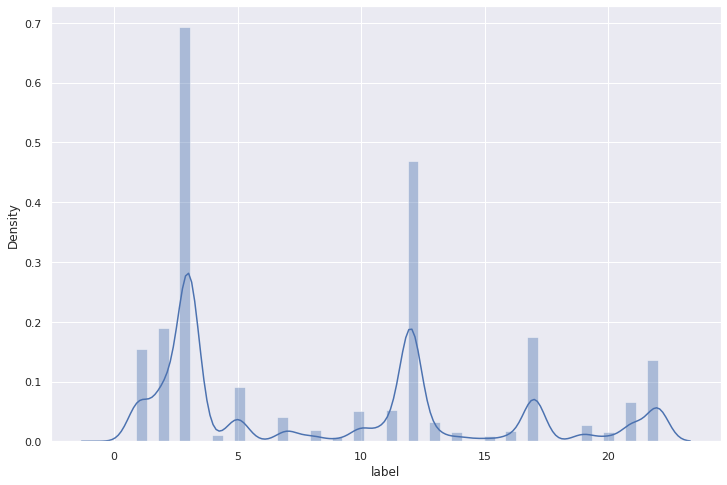

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.distplot(y_train, hist = True)

In [ ]:
y_train.value_counts()

3     236253
12    159911
2      64595
17     59654
1      52863
22     46177
5      30897
21     22654
11     17735
10     17286
7      14031
13     11014
19      9477
8       6691
16      5996
14      5442
20      5348
4       3532
15      3264
9       2284
6          2
18         2
0          2
Name: label, dtype: int64

In [ ]:
type(y_train.value_counts(sort = True))
y_train.value_counts(sort = False).sort_index()

0          2
1      52863
2      64595
3     236253
4       3532
5      30897
6          2
7      14031
8       6691
9       2284
10     17286
11     17735
12    159911
13     11014
14      5442
15      3264
16      5996
17     59654
18         2
19      9477
20      5348
21     22654
22     46177
Name: label, dtype: int64

In [ ]:
y_train.index

Int64Index([155036, 314614, 590893,  33451, 829947, 406596, 140901, 668432,
            819322, 436094,
            ...
             37302,  78256, 344281, 148249, 114358, 470261, 364624, 685212,
            838245, 650456],
           dtype='int64', length=775110)

## Text Vectorization

In [ ]:
UNIQUE_FEATURES = 30_000

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=UNIQUE_FEATURES, stop_words='english', ngram_range=(1,2))

In [ ]:
# tfidf_vectorizer = tfidf.fit(X_train)
# tf_len = len(tfidf_vectorizer.vocabulary_)

In [ ]:
import pickle

# tfidf_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/TFIDF V2/tfidf.pickle"
# with open(tfidf_path, 'wb') as file_pi:
#     pickle.dump(tfidf_vectorizer, file_pi)

In [ ]:
tfidf_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/TFIDF V2/tfidf.pickle"

with open(tfidf_path, "rb") as file_pi:
    tfidf_vectorizer = pickle.load(file_pi)

In [ ]:
tf_len = len(tfidf_vectorizer.vocabulary_)
tf_len

30000

In [ ]:
X_train = tfidf_vectorizer.transform(X_train).astype('float32')
X_valid = tfidf_vectorizer.transform(X_val).astype('float32')

## Under sampling and over sampling

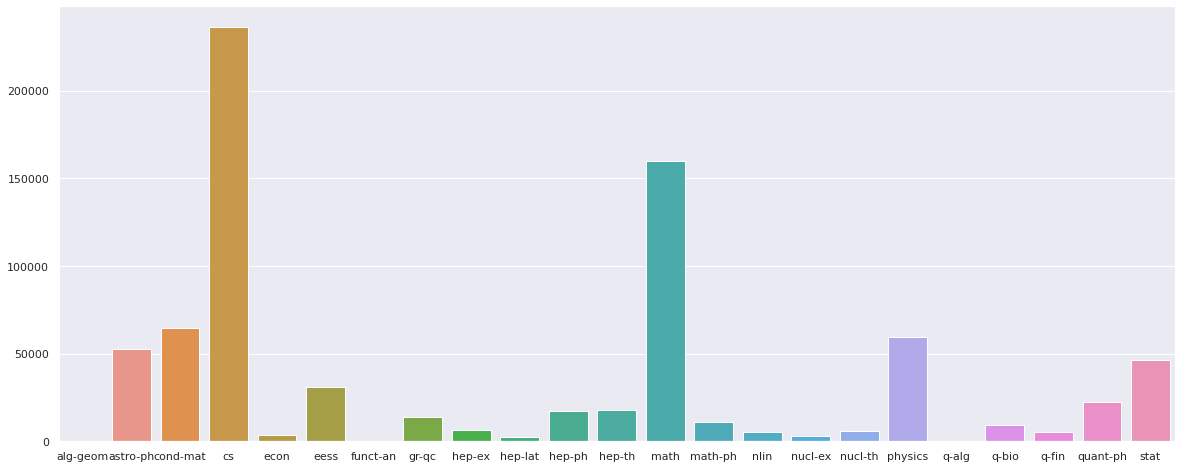

In [ ]:
value_counts_y_train = list(y_train.value_counts().sort_index())
label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)
sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train)

In [ ]:
type(X_train), X_train.shape

(scipy.sparse.csr.csr_matrix, (775110, 30000))

In [ ]:
count_dict_oversample = {}
threshold = 5_000
for i in range(23):
  if value_counts_y_train[i] < threshold:
    count_dict_oversample[i] = threshold
  else:
    count_dict_oversample[i] = value_counts_y_train[i]
count_dict_oversample

{0: 5000,
 1: 52863,
 2: 64595,
 3: 236253,
 4: 5000,
 5: 30897,
 6: 5000,
 7: 14031,
 8: 6691,
 9: 5000,
 10: 17286,
 11: 17735,
 12: 159911,
 13: 11014,
 14: 5442,
 15: 5000,
 16: 5996,
 17: 59654,
 18: 5000,
 19: 9477,
 20: 5348,
 21: 22654,
 22: 46177}

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ns = RandomOverSampler(count_dict_oversample)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy={0: 5000, 1: 52863, 2: 64595, 3: 236253, 4: 5000, 5: 30897, 6: 5000, 7: 14031, 8: 6691, 9: 5000, 10: 17286, 11: 17735, 12: 159911, 13: 11014, 14: 5442, 15: 5000, 16: 5996, 17: 59654, 18: 5000, 19: 9477, 20: 5348, 21: 22654, 22: 46177} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
print(y_train.value_counts().sort_index())
print(y_train_ns.value_counts().sort_index())

0          2
1      52863
2      64595
3     236253
4       3532
5      30897
6          2
7      14031
8       6691
9       2284
10     17286
11     17735
12    159911
13     11014
14      5442
15      3264
16      5996
17     59654
18         2
19      9477
20      5348
21     22654
22     46177
Name: label, dtype: int64
0       5000
1      52863
2      64595
3     236253
4       5000
5      30897
6       5000
7      14031
8       6691
9       5000
10     17286
11     17735
12    159911
13     11014
14      5442
15      5000
16      5996
17     59654
18      5000
19      9477
20      5348
21     22654
22     46177
Name: label, dtype: int64


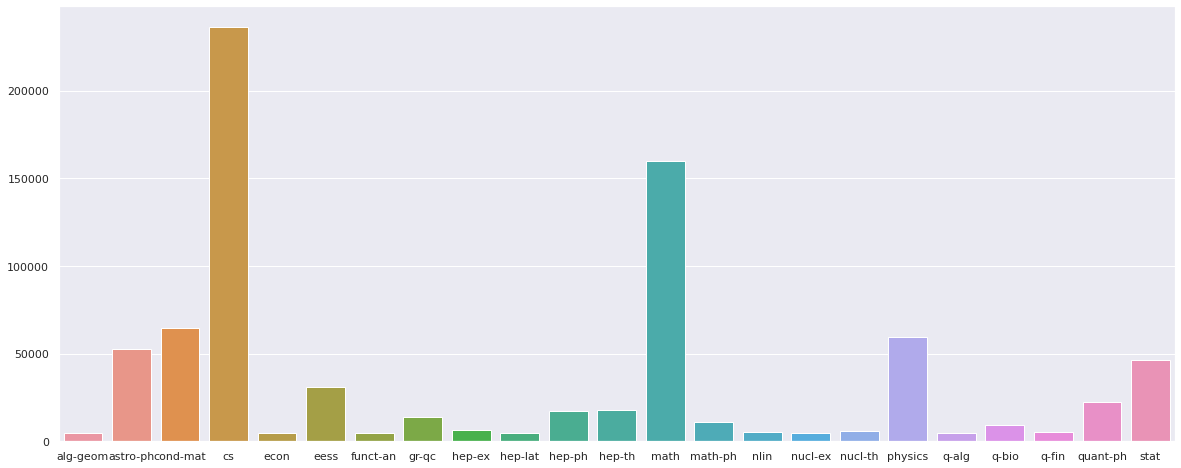

In [ ]:
value_counts_y_train_ns = list(y_train_ns.value_counts().sort_index())

label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)

sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train_ns)

In [ ]:
count_dict_undersample = {}
threshold = 10_000
for i in range(23):
  if value_counts_y_train_ns[i] > threshold:
    count_dict_undersample[i] = threshold
  else:
    count_dict_undersample[i] = value_counts_y_train_ns[i]
count_dict_undersample

{0: 5000,
 1: 10000,
 2: 10000,
 3: 10000,
 4: 5000,
 5: 10000,
 6: 5000,
 7: 10000,
 8: 6691,
 9: 5000,
 10: 10000,
 11: 10000,
 12: 10000,
 13: 10000,
 14: 5442,
 15: 5000,
 16: 5996,
 17: 10000,
 18: 5000,
 19: 9477,
 20: 5348,
 21: 10000,
 22: 10000}

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(count_dict_undersample)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_ns, y_train_ns)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy={0: 5000, 1: 10000, 2: 10000, 3: 10000, 4: 5000, 5: 10000, 6: 5000, 7: 10000, 8: 6691, 9: 5000, 10: 10000, 11: 10000, 12: 10000, 13: 10000, 14: 5442, 15: 5000, 16: 5996, 17: 10000, 18: 5000, 19: 9477, 20: 5348, 21: 10000, 22: 10000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


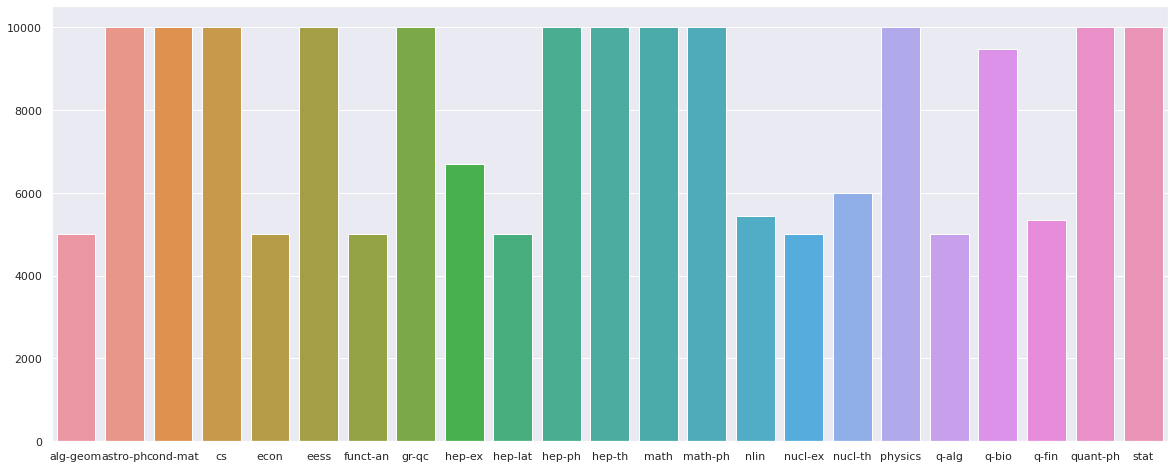

In [ ]:
value_counts_y_train_under = list(y_train_under.value_counts().sort_index())

label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)

sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train_under)

In [ ]:
y_train_under.value_counts()

11    10000
10    10000
21    10000
17    10000
13    10000
12    10000
1     10000
22    10000
7     10000
5     10000
3     10000
2     10000
19     9477
8      6691
16     5996
14     5442
20     5348
9      5000
6      5000
4      5000
15     5000
18     5000
0      5000
Name: label, dtype: int64

In [ ]:
y_train_under

0          0
1          0
2          0
3          0
4          0
          ..
182949    22
182950    22
182951    22
182952    22
182953    22
Name: label, Length: 182954, dtype: int64

## MultinomialNB MODEL

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_multinomial_nb = MultinomialNB()

In [ ]:
model_multinomial_nb.fit(X_train_under, y_train_under)

MultinomialNB()

In [11]:
import pickle
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/ML model/model_multinomial_nb.pth"
# pickle.dump(model_multinomial_nb, open(model_path, 'wb'))

In [12]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/ML model/model_multinomial_nb.pth"
loaded_model = pickle.load(open(model_path, 'rb'))

### Submission Data Creation
*   List item
*   List item



In [16]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "preprocessed_test_version_2_lemmatizer.csv"
test_df = pd.read_csv(folder_path + file_path)

In [17]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43785 entries, 0 to 43784
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        43785 non-null  object
 1   category  43785 non-null  object
 2   text      43785 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [19]:
X_test = test_df["text"]

In [20]:
tfidf_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/TFIDF V2/tfidf.pickle"

with open(tfidf_path, "rb") as file_pi:
    tfidf_vectorizer = pickle.load(file_pi)

In [21]:
tf_len = len(tfidf_vectorizer.vocabulary_)
tf_len

30000

In [22]:
X_test_transform = tfidf_vectorizer.transform(X_test).astype('float32')

In [23]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/ML model/model_multinomial_nb.pth"
model_multinomial_nb = pickle.load(open(model_path, 'rb'))

In [25]:
y_test_pred = model_multinomial_nb.predict(X_test_transform)
y_test_pred

array([ 4,  2, 22, ...,  5,  3,  5])

In [26]:
y_true = le.transform(test_df.category)
y_true

array([20,  2, 12, ...,  3,  5,  3])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(classification_report(y_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.90      0.79      0.84      3012
           2       0.77      0.68      0.72      3652
           3       0.87      0.50      0.64     13308
           4       0.20      0.54      0.29       199
           5       0.27      0.72      0.39      1734
           6       0.00      0.00      0.00         0
           7       0.43      0.69      0.53       794
           8       0.37      0.43      0.40       375
           9       0.34      0.51      0.41       127
          10       0.52      0.49      0.50       979
          11       0.43      0.47      0.45       996
          12       0.82      0.61      0.70      9059
          13       0.15      0.62      0.24       608
          14       0.28      0.31      0.29       305
          15       0.33      0.41      0.37       186
          16       0.39      0.42      0.41       342
          17       0.62    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_labels = le.inverse_transform(y_test_pred)
print(predicted_labels)

['econ' 'cond-mat' 'stat' ... 'eess' 'cs' 'eess']


In [ ]:
len(predicted_labels)

43785

In [ ]:
test_df["category"] = predicted_labels

In [ ]:
test_df.head()

,id,category,text
0,2107.01095,econ,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,stat,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
import random
def viewTextCategory(df, number = 10):
  sample_df = df.sample(number)
  for text, category in zip(sample_df["text"], sample_df["category"]):
    print("========================")
    print(category)
    print(text)

In [ ]:
viewTextCategory(test_df, number = 10)

nlin
stability cluster second order kuramoto model random graph kuramoto model coupled phase oscillator inertia erdos renyi graph analyzed work system intrinsic frequency sampled bimodal distribution identify variety two cluster pattern study stability end decompose description cluster dynamic two system one governing macro dynamic center mass two cluster second governing micro dynamic individual oscillator inside cluster former low dimensional ode whereas latter system two coupled vlasov pdes stability cluster dynamic depends stability low dimensional group motion coherence oscillator group show loss coherence one cluster lead loss stability two cluster state formation chimera state analysis paper generalized cover state two cluster coupled system w random graph result apply model power grid fluctuating source
eess
deepscaletool tool accurate estimation technology scaling deep submicron era estimation classical cmos constant field dennard scaling method define scaling factor various d

In [ ]:
submission_df = test_df.drop("text", axis = 1)

In [ ]:
submission_df.head(10)

,id,category
0,2107.01095,econ
1,1906.08519,cond-mat
2,2105.05523,stat
3,1906.08731,cs
4,1703.08445,math
5,2106.13444,cond-mat
6,1812.05778,quant-ph
7,1911.0796,cs
8,1808.07576,stat
9,1902.02865,cs


In [ ]:
submission_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/ML model/submission_multinomial_nb.csv"
submission_df.to_csv(submission_path, index = False)

# SVM

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel="linear", max_iter = 5, verbose = True)

In [ ]:
svc_classifier.fit(X_train_under, y_train_under)

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=5, verbose=True)

In [ ]:
import pickle
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/ML model/model_svc.pth"
pickle.dump(svc_classifier, open(model_path, 'wb'))

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/ML model/model_svc.pth"
loaded_model = pickle.load(open(model_path, 'rb'))

In [ ]:
# took about 2 minutes
y_val_pred = svc_classifier.predict(X_valid)

In [ ]:
y_loaded_pred = svc_classifier.predict(X_valid)

In [ ]:
np.array_equal(y_val_pred, y_loaded_pred)

True

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(f1_score(y_val, y_val_pred, average="micro"))
print(f1_score(y_val, y_val_pred, average="macro"))

0.36210580093818223
0.12929067800812163


In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           1       0.42      0.56      0.48      5874
           2       0.21      0.70      0.32      7177
           3       0.47      0.81      0.59     26250
           4       0.06      0.14      0.09       392
           5       0.13      0.13      0.13      3433
           7       0.22      0.29      0.25      1559
           8       0.23      0.33      0.27       744
           9       0.18      0.19      0.18       254
          10       0.35      0.06      0.10      1921
          11       0.18      0.01      0.02      1971
          12       0.80      0.01      0.01     17768
          13       0.09      0.04      0.05      1224
          14       0.00      0.00      0.00       605
          15       0.00      0.00      0.00       363
          16       0.33      0.00      0.00       666
          17       0.67      0.00      0.00      6628
          18       0.00      0.00      0.00         0
          19       0.50    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1